In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import math
import scipy

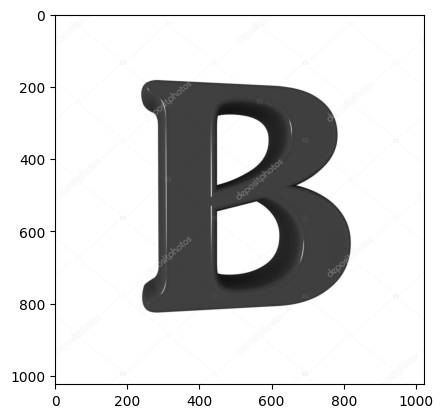

In [2]:
## image fourier transform in grayscale  --------------------------------

img = cv2.imread("B.jpg",cv2.IMREAD_GRAYSCALE)

f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)

phase = fshift.imag
abs = np.abs(fshift)
magnitude_spectrum = 20*np.log(abs)

magnitude_spectrum = np.asarray(magnitude_spectrum, dtype=np.uint8)
plt.imshow(img, cmap='gray')
plt.show()
# cv2.imshow("magnitude_spectrum", magnitude_spectrum)
# cv2.waitKey(0)
# cv2.destroyWindow()

1024 1024


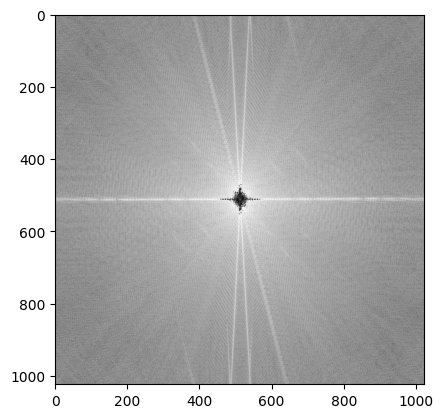

In [3]:
## ploting the fourier shift  ------------------------------------------------------

img = cv2.imread("image.jpg")
img_data = np.asarray(img)
heigth, weidth = img.shape[:2]
print(heigth, weidth)
plt.imshow(img)
plt.show()

In [4]:
## making filter as same shape of original image 

channels = 3
mid_weidth = weidth//2
mid_heigth = heigth//2

radius = 50

# Create an empty image
img = np.zeros((heigth, weidth, channels), dtype=np.uint8)

for i in range(heigth):       
    for j in range(weidth):
        dis = math.sqrt((i - mid_weidth)**2 + (j - mid_heigth)**2)

        if dis < radius:
            img[i, j] = 255


# # Creating an image with centre square

# square_start = 342
# Create an empty image

# img = np.zeros((heigth, weidth, channels), dtype=np.uint8)

# for i in range(1024):
#     for j in range(1024):
#         if i>342 and i<682 :
#             if j<342 or j>682:
#                 img[i, j] = 0
#             else:
#                 img[i, j] = 255

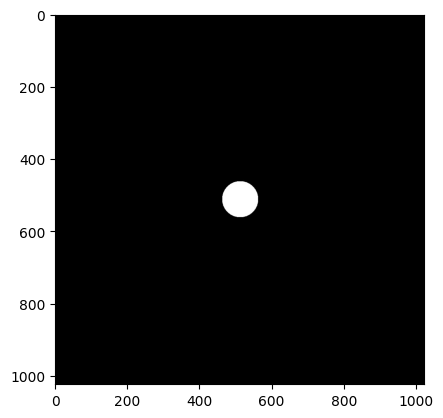

True

In [5]:
## saving the filter image and reshapeing same as fourier_shift image to multiply

filter_img = cv2.imread("filter_image.jpg")
f_img_data = np.asarray(filter_img)
filter_img_data = f_img_data[:, :, 0]

plt.imshow(filter_img)
plt.show()
cv2.imwrite('filter.jpg', filter_img)

C:\Users\Sahadat_Hossain\AppData\Local\Temp\ipykernel_14672\4200958918.py:6: RuntimeWarning: divide by zero encountered in log
  spec = np.log(mag) / 20


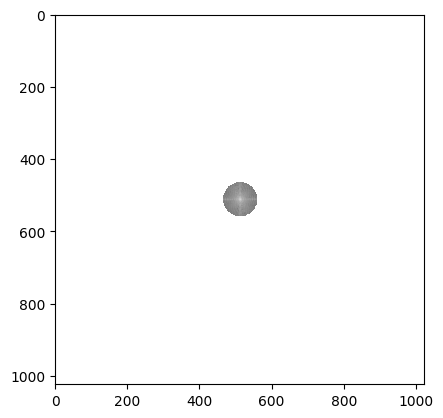

<Figure size 640x480 with 0 Axes>

In [6]:
## after filtering the fourier_shift image with the filter --------------

filter_img_data.shape
dft_shift_masked = np.multiply(fshift, filter_img_data) / 255
mag = np.abs(dft_shift_masked)
spec = np.log(mag) / 20
plt.imshow(spec, cmap= 'gray')
plt.show()
plt.savefig('after_filter.jpg')

In [7]:
## inverwe fourier shift ---------------------------------------
ishift = np.fft.ifftshift(dft_shift_masked)
final_ifft = np.fft.ifft2(ishift, axes= (0, 1))

## calculating the absulate value of the final inverse fourier to plot
img_back = np.abs(final_ifft).clip(0,255).astype(np.uint8)

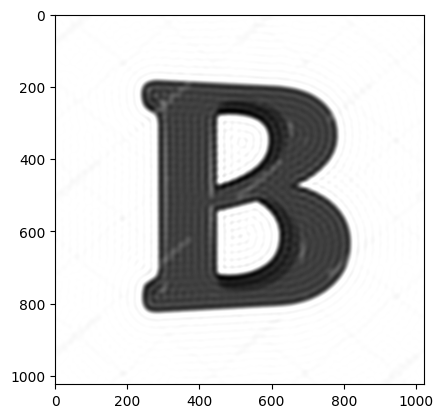

In [8]:
## final inverse fourier image for the filter

plt.imshow(img_back, cmap= 'gray')
plt.show()